### Data_Loader Testing

In [1]:
import data_loader
import torch
from torch.utils.data import DataLoader
from pathlib import Path
from torchvision.transforms import v2 as transforms


In [2]:
test_dir = Path("mbrimberry_files\Submissions\\test")
train_dir = Path("mbrimberry_files\Submissions\\train")

In [4]:
trans = transforms.Compose(
    [
        transforms.ToImage(),
        transforms.Resize(size=(1056,816))
        
    ])
train_data = data_loader.DeskTopDataset(targ_dir=train_dir,transform=trans)
test_data = data_loader.DeskTopDataset(targ_dir=test_dir,transform=trans)


Desk Images\classes.txt
Desk Images\classes.txt


torch.Size([4, 1056, 816])
torch.Size([1056, 816, 4])


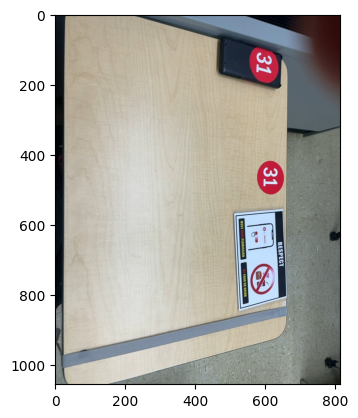

In [5]:
import matplotlib.pyplot as plt
image, targets = train_data[2]
print(f"{image.shape}")
image_permute = image.permute(1,2,0)
print(f"{image_permute.shape}")
fig, ax = plt.subplots(1)
ax.imshow(image_permute)

In [13]:
img, targets = train_data[0]
print(img)
print(targets)

Image([[[193, 192, 193,  ...,  20,  36,  34],
        [196, 195, 195,  ...,   0,  21,  36],
        [197, 197, 196,  ...,   0,   1,  22],
        ...,
        [204, 202, 202,  ...,  49,  48,  48],
        [204, 203, 202,  ...,  49,  48,  48],
        [206, 205, 205,  ...,  49,  49,  49]],

       [[187, 186, 187,  ...,  29,  45,  43],
        [190, 189, 189,  ...,   8,  30,  45],
        [190, 190, 189,  ...,   7,  10,  31],
        ...,
        [199, 197, 197,  ...,   4,   3,   3],
        [199, 198, 197,  ...,   4,   3,   3],
        [201, 200, 200,  ...,   4,   4,   4]],

       [[181, 180, 181,  ...,  50,  66,  64],
        [184, 183, 183,  ...,  29,  51,  66],
        [186, 186, 185,  ...,  28,  31,  52],
        ...,
        [196, 194, 194,  ...,  11,  10,  10],
        [196, 195, 194,  ...,  11,  10,  10],
        [198, 197, 197,  ...,  11,  11,  11]],

       [[255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 

In [7]:
len(train_data)


182

In [8]:
len(test_data)

40

In [9]:
test_data.classes

['Calculator', 'Desk number']

In [10]:
BATCH_SIZE= 32
NUM_WORKERS = 0

dataloader = DataLoader(dataset=train_data,
                        batch_size=BATCH_SIZE,
                        num_workers=NUM_WORKERS,
                        shuffle=False)

In [11]:
def collate_fn(batch):
    return{
        'img' : torch.stack([x['img'] for x in batch])
    }

In [12]:
img, targets = next(iter(dataloader))
img[1]

tensor([[[ 53,  51,  55,  ..., 147, 141, 137],
         [ 53,  49,  52,  ..., 142, 138, 130],
         [ 56,  52,  50,  ..., 141, 143, 139],
         ...,
         [ 40,  43,  44,  ..., 163, 160, 161],
         [ 37,  41,  48,  ..., 163, 164, 161],
         [ 39,  41,  51,  ..., 163, 163, 160]],

        [[ 68,  67,  71,  ..., 141, 133, 129],
         [ 68,  64,  67,  ..., 136, 131, 123],
         [ 70,  67,  65,  ..., 134, 137, 133],
         ...,
         [ 36,  39,  40,  ..., 164, 161, 163],
         [ 32,  36,  44,  ..., 165, 166, 162],
         [ 32,  36,  47,  ..., 165, 164, 160]],

        [[ 83,  83,  88,  ..., 119, 112, 109],
         [ 83,  79,  83,  ..., 113, 110, 102],
         [ 84,  81,  80,  ..., 111, 114, 110],
         ...,
         [ 28,  32,  34,  ..., 161, 160, 162],
         [ 26,  30,  38,  ..., 162, 163, 160],
         [ 28,  31,  41,  ..., 162, 161, 158]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [25

In [ ]:
import torchvision
import torchvision.transforms.v2
from torchvision import utils
from torchvision.transforms.v2 import functional as F
viz = utils.draw_bounding_boxes(F.ToImage(img), boxes=bbox)
F.to_pil_image(viz).show()